# Assignment 2: Gaussian Mixture Model and Hierarchical Clustering

## Team: White Walkers

### Student Names:

-  Pratik Dhumal (SJSU ID: 012457185)
-  Sourabh Namilikonda (SJSU ID: 012414948)
-  Hrishikesh Rendalkar (SJSU ID: 011485994)
-  Hemambujam Veeraraghavan (SJSU ID: 012482392)


#### Business Objective:
Abalone are a family of small to very large sea snails [1], which is a delicacy and who’s shell have been used for jewelry, for ages. Traditionally, to estimate the age of an Abalone:
1.	There is the counting of external growth checks on the shell.
2.	And the counting of internal growth checks within sections of the shell. 

This estimation is time consuming and painstaking. We, as part of assignment 1, decided to minimize this estimation period by calculating the age of an Abalone using its physical attributes. 


#### Dataset:
We came across the dataset that provided us with sample data to calculate the age using the height and weight of an Abalone. This dataset had ample data, with about 4000 sample data, which served to be useful for the K-Means clustering. The dataset can be accessed at: 
https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/

#### Data Wrangling:
Using data from the above-mentioned dataset, we converted data from a plain text format to a list of lists in Python, that can be used for our assignment purpose. Below is a code snippet on how data was accessed:

 

#### Data Preparation:
Using the NumPy library in python, the data was prepped and plotted into an image for the prepared dataset before performing K-means clustering, just to ensure we could choose the right K value.


#### K-Mean Clustering:
Using the dataset, we wanted to make a K-Mean, where given the height and width of Abalone, we would be able to classify the input into:

1. Infant
2. Juvenile
3. Adult

 
#### Data Interpretation:
From the below generated KMeans, we can interpret that the age of an abalone can be directly proportional to its height and weight. The three centroids segregate the dataset into three sub-sets making it easy to understand the data better from its visualization.  

### Business Solution:
With this K-means clustering, it solves the problem of having to check on the internal and external growth of shells on an abalone. This also save a lot of time, with just measuring the height and weight of an abalone will be able to plot it on the graph which would give an estimate on the age of the abalone.

#### References:
[1] https://en.wikipedia.org/wiki/Abalone

Females: 
1307
Males: 
1528
Infants: 
1342


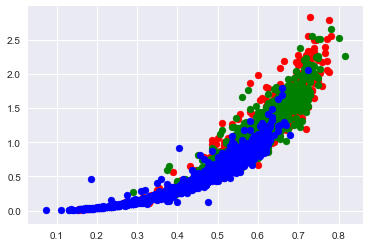

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

import urllib.request
import matplotlib.pyplot as mp
#with urllib.request.urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data") as url:
with urllib.request.urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data") as url:
    s = url.read()
    s = s.decode("utf-8")
    rows = s.splitlines()
    table = []
    for i in rows:
        row = (i.split(','))
        table.append(row)
    #print(table)
    tableFemale=[item for item in table if item[0] =='F']
    print('Females: ')
    print(len(tableFemale))
    tableMale=[item for item in table if item[0] =='M']
    print('Males: ')
    print(len(tableMale))
    tableInfant=[item for item in table if item[0] =='I']
    print('Infants: ')
    print(len(tableInfant))
    tableMale=np.array(tableMale)
    tbl=tableMale[:,[1,4]]
    table3=[[float(y) for y in x] for x in tbl]
    table4=np.array(table3)
    tableFemale=np.array(tableFemale)
    tbl1=tableFemale[:,[1,4]]
    table31=[[float(y) for y in x] for x in tbl1]
    table41=np.array(table31)
    tableInfant=np.array(tableInfant)
    tbl2=tableInfant[:,[1,4]]
    table32=[[float(y) for y in x] for x in tbl2]
    table42=np.array(table32)
    
    
    plt.scatter(table4[:, 0], table4[:, 1], c='red');
    plt.scatter(table41[:, 0], table41[:, 1], c='green');
    plt.scatter(table42[:, 0], table42[:, 1], c='blue');

### More Insights into the Dataset:

Above is the visual respresentation of the dataset before applying Clustering. This depicts the three types of Abalone we had considered in the above code snippet to apply K-Means.

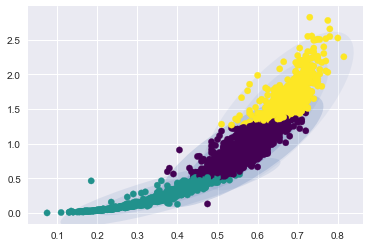

In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
#import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import urllib.request
import matplotlib.pyplot as mp
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


with urllib.request.urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data") as url:
    s = url.read()
    s = s.decode("utf-8")
    rows = s.splitlines()
    table = []
    for i in rows:
        row = (i.split(','))
        table.append(row)
    table1 = np.array(table)
    table2=table1[:,[1,4]]
    table3=[[float(y) for y in x] for x in table2]
    table4=np.array(table3)
    X=table4

    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)

    def draw_ellipse(position, covariance, ax=None, **kwargs):
        """Draw an ellipse with a given position and covariance"""
        ax = ax or plt.gca()
    
    # Convert covariance to principal axes
        if covariance.shape == (2, 2):
            U, s, Vt = np.linalg.svd(covariance)
            angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
            width, height = 2 * np.sqrt(s)
        else:
            angle = 0
            width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
        for nsig in range(1, 4):
            ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
    
    def plot_gmm(gmm, X, label=True, ax=None):
        ax = ax or plt.gca()
        labels = gmm.fit(X).predict(X)
        if label:
            ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
        else:
            ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
        ax.axis('auto')
    
        w_factor = 0.2 / gmm.weights_.max()
        for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
            draw_ellipse(pos, covar, alpha=w * w_factor)
            
    centers = kmeans.cluster_centers_
    from sklearn.mixture import GMM
    gmm = GMM(n_components=2).fit(X)
    labels = gmm.predict(X)
    gmm = GMM(n_components=3, covariance_type='full', random_state=2)
    plot_gmm(gmm, X)

### Gaussian Mixture Model:

The above image depicts the dataset after applying GMM. The covarience used above was "full" - A more complicated and computationally expensive model. This is considered to be expensive as it allows each cluster to be modeled as an ellipse with arbitrary orientation. We decided to go with this model as the dataset required atttention to detail. This gives a clear boundary, in simple terms, that makes it easy to differentiate between an infant, female and a male abalone. This Gaussian Mixture Mode gives the necessary backing for the K-Means that was applied on the dataset to give more credibility to the business solution we try to propose for the usecase.

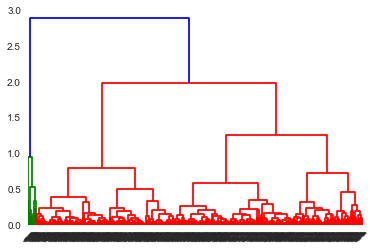

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
mergings = linkage (X, method = 'complete')
dendrogram(mergings,
           labels=X,
           leaf_rotation=45,
           leaf_font_size=2,
          )
plt.show()
    


### Hierarchical Clustering:

we performed a permutation test similar to above dataset, where the data are randomly permuted within their columns and the
cluster analysis repeated each time to obtain the clusters. The permutation distribution of levels at which the clusters are formed, can be found above. While the green repersents the infant abalones, the red and blue represents the female and male abalones, respectively. 
